# Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

C:\rahul\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
ch = fetch_california_housing()

In [4]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[ch['data'], ch['target']],
                    columns=ch['feature_names'] + ['target'])


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
x = df.drop('target', axis = 1)
y = df['target']

# Splitting 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Model

In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)

# Model Evaluation

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²) Score: 0.58


# Visualisation

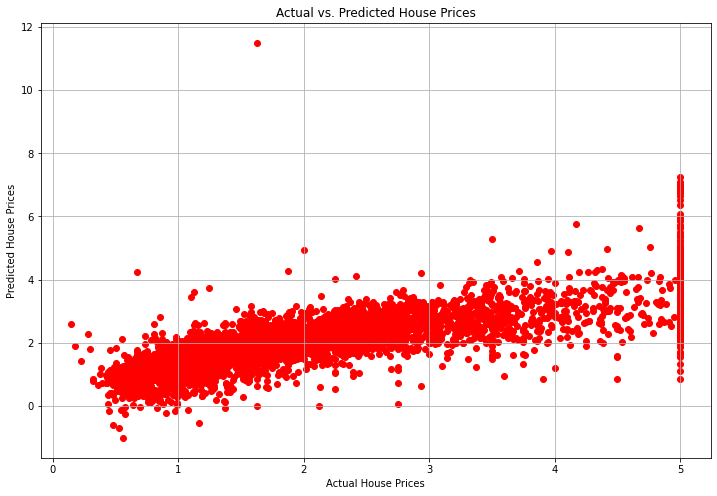

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='red', alpha=1)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Fine tuning the model

In [18]:
correlations = df.corr()
correlations["target"].sort_values(ascending=False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

In [19]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [42]:
x1 = df[['MedInc','AveRooms','HouseAge']]
y1 = df['target']

In [43]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()

In [45]:
model.fit(x1_train, y1_train)

LinearRegression()

In [46]:
y1_pred = model.predict(x1_test)

In [47]:
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print(f'Mean Absolute Error (MAE): {mae1:.2f}')
print(f'Mean Squared Error (MSE): {mse1:.2f}')
print(f'R-squared (R²) Score: {r21:.2f}')

Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.66
R-squared (R²) Score: 0.50


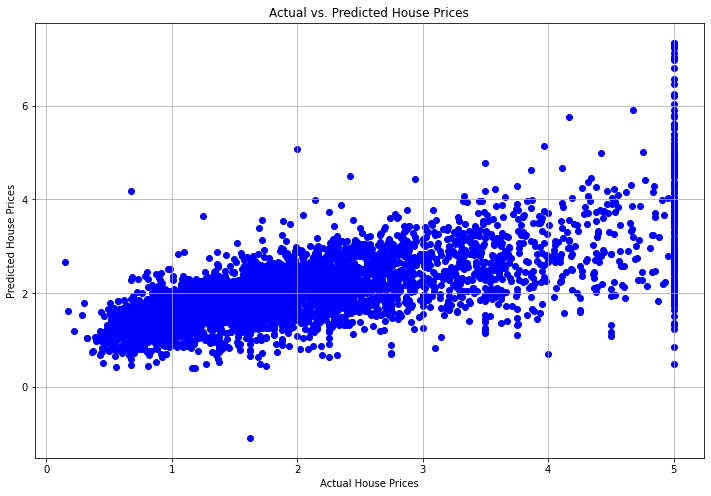

In [48]:
plt.figure(figsize=(12, 8))
plt.scatter(y1_test, y1_pred, color='blue', alpha=1)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x1_train, y1_train)

RandomForestRegressor(random_state=42)

In [53]:
y_rf_pred = rf.predict(x1_test)

In [55]:
rf_mse = mean_squared_error(y_rf_pred,y1_test)
rf_mae = mean_absolute_error(y_rf_pred,y1_test)
rf_r2 = r2_score(y_rf_pred,y1_test)

print(f'Mean Absolute Error (MAE): {rf_mae:.2f}')
print(f'Mean Squared Error (MSE): {rf_mse:.2f}')
print(f'R-squared (R²) Score: {rf_r2:.2f}')

Mean Absolute Error (MAE): 0.56
Mean Squared Error (MSE): 0.60
R-squared (R²) Score: 0.31


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='r2')

grid_search.fit(x1_train, y1_train)

C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\rahul\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\rahul\anaconda\lib\site-packag

C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\rahul\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\rahul\anaconda\lib\site-packag

C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\rahul\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\rahul\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\rahul\anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\rahul\anaconda\lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='r2')

In [57]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [59]:
final_model = RandomForestRegressor(random_state=42,max_features = 2,n_estimators=30)

In [60]:
final_model.fit(x1_train, y1_train)

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [62]:
final_model_pred = final_model.predict(x1_test)

In [63]:
fm_mse = mean_squared_error(final_model_pred,y1_test)
fm_mae = mean_absolute_error(final_model_pred,y1_test)
fm_r2 = r2_score(final_model_pred,y1_test)

print(f'Mean Absolute Error (MAE): {fm_mae:.2f}')
print(f'Mean Squared Error (MSE): {fm_mse:.2f}')
print(f'R-squared (R²) Score: {fm_r2:.2f}')

Mean Absolute Error (MAE): 0.56
Mean Squared Error (MSE): 0.60
R-squared (R²) Score: 0.31
